In [28]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Combining all the csv files

In [2]:
df_dir = "./raw_data/"
raw_csv = [f for f in os.listdir(df_dir) if f.endswith('.csv')]
print(f"list of all csv files {raw_csv}")
dfs = []

for csv in raw_csv:
    df = pd.read_csv(os.path.join(df_dir, csv))
    dfs.append(df)
main_df = pd.concat(dfs, ignore_index=True)
main_df.head()

list of all csv files ['dataset-of-00s.csv', 'dataset-of-10s.csv', 'dataset-of-60s.csv', 'dataset-of-70s.csv', 'dataset-of-80s.csv', 'dataset-of-90s.csv']


,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


# Data understanding

In [3]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

## Description of numerical values

In [6]:
main_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599792,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


## Mean, Median, Mode of all columns

In [17]:
for col in main_df.columns:
    if main_df[col].dtype!="object":
        print(f"The mean value for {col} is {main_df[col].mean()}")
        print(f"The median value for {col} is {main_df[col].median()}")
        print(f"The mode value for {col} is {main_df[col].mode()[0]}")
        print("-----------------------------------------------------------")
        

The mean value for danceability is 0.5396949642387974
The median value for danceability is 0.552
The mode value for danceability is 0.62
-----------------------------------------------------------
The mean value for energy is 0.5795448943219967
The median value for energy is 0.601
The mode value for energy is 0.641
-----------------------------------------------------------
The mean value for key is 5.213594122512529
The median value for key is 5.0
The mode value for key is 0
-----------------------------------------------------------
The mean value for loudness is -10.221525276115408
The median value for loudness is -9.257
The mode value for loudness is -8.142
-----------------------------------------------------------
The mean value for mode is 0.69335376830633
The median value for mode is 1.0
The mode value for mode is 1
-----------------------------------------------------------
The mean value for speechiness is 0.07296045832725151
The median value for speechiness is 0.0434
The mod

## Count of null values

In [18]:
main_df.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [49]:
for col in main_df.columns:
    if main_df[col].dtype!="object":
        print(f"Range of {col} is {main_df[col].max() - main_df[col].min()}")
        print(f"Max & Min of {col} is {main_df[col].max()}, {main_df[col].min()}")
        print("--------------------")

Range of danceability is 0.988
Max & Min of danceability is 0.988, 0.0
--------------------
Range of energy is 0.999749
Max & Min of energy is 1.0, 0.000251
--------------------
Range of key is 11
Max & Min of key is 11, 0
--------------------
Range of loudness is 52.997
Max & Min of loudness is 3.744, -49.253
--------------------
Range of mode is 1
Max & Min of mode is 1, 0
--------------------
Range of speechiness is 0.96
Max & Min of speechiness is 0.96, 0.0
--------------------
Range of acousticness is 0.996
Max & Min of acousticness is 0.996, 0.0
--------------------
Range of instrumentalness is 1.0
Max & Min of instrumentalness is 1.0, 0.0
--------------------
Range of liveness is 0.986
Max & Min of liveness is 0.999, 0.013
--------------------
Range of valence is 0.996
Max & Min of valence is 0.996, 0.0
--------------------
Range of tempo is 241.423
Max & Min of tempo is 241.423, 0.0
--------------------
Range of duration_ms is 4155059
Max & Min of duration_ms is 4170227, 15168


In [50]:
main_df["key"].value_counts()

key
0     5130
7     4962
2     4619
9     4469
5     3790
4     3323
1     3278
11    2815
10    2728
8     2345
6     2217
3     1430
Name: count, dtype: int64

In [26]:
main_df.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

# Exploratory Data Analysis

## Histogram to see distribution of data


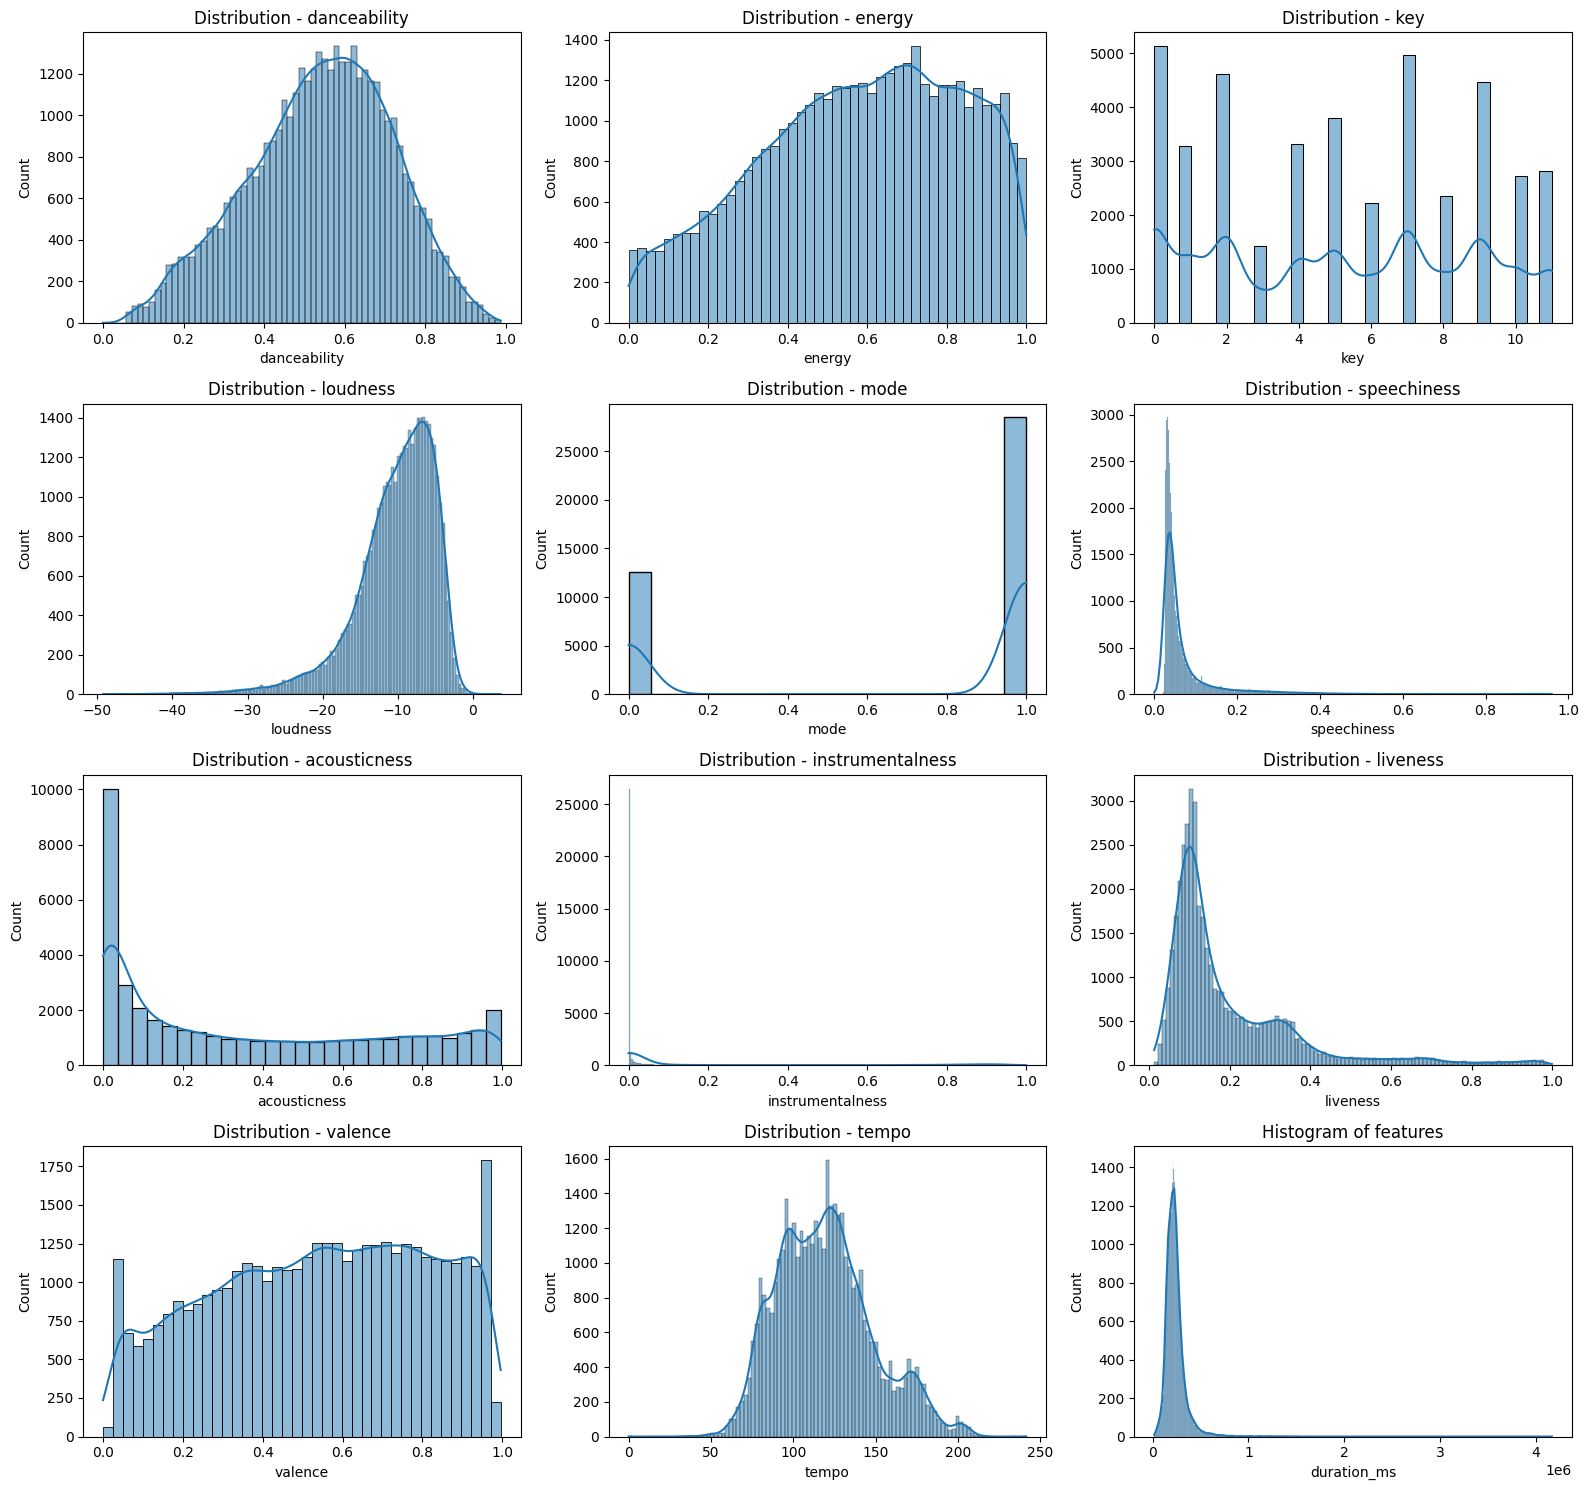

In [54]:
eda_columns = [['danceability', 'energy', 'key'],['loudness',
       'mode', 'speechiness'], ['acousticness', 'instrumentalness', 'liveness'],
       ['valence', 'tempo', 'duration_ms']]
fig, axs = plt.subplots(4, 3, figsize=(16, 15))

for row in range(4):
    for col in range(3):
        sns.histplot(main_df[eda_columns[row][col]], kde=True, ax=axs[row, col])
        axs[row, col].set_title(f"Distribution - {eda_columns[row][col]}")
plt.title("Histogram of features")
plt.tight_layout()
plt.show()

/Users/rohitnagotkar/CPSC 5310 ML/ML_course/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


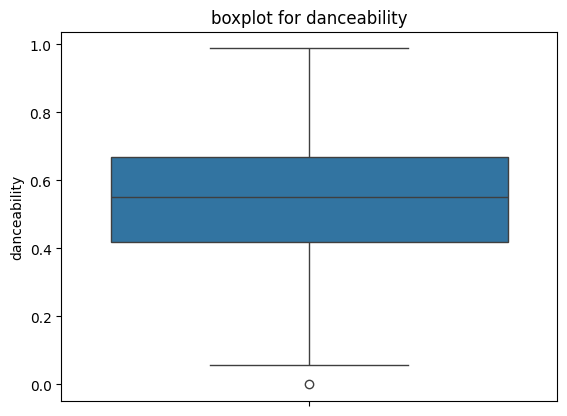

/Users/rohitnagotkar/CPSC 5310 ML/ML_course/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


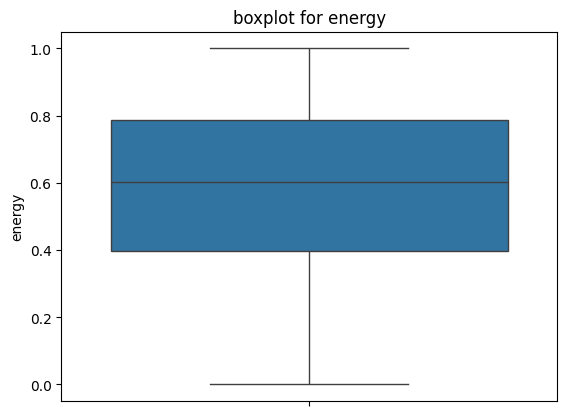

/Users/rohitnagotkar/CPSC 5310 ML/ML_course/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


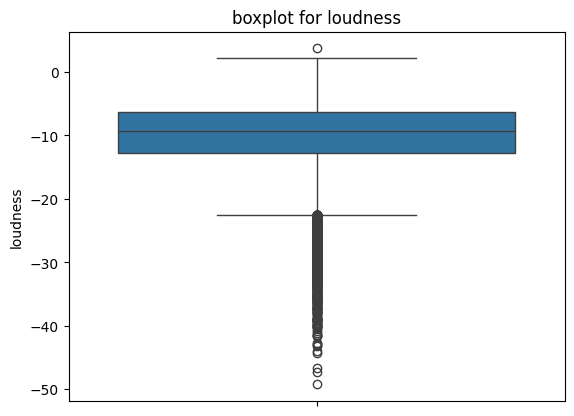

/Users/rohitnagotkar/CPSC 5310 ML/ML_course/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


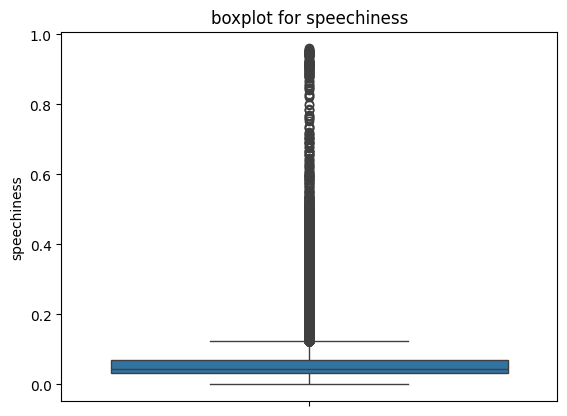

/Users/rohitnagotkar/CPSC 5310 ML/ML_course/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


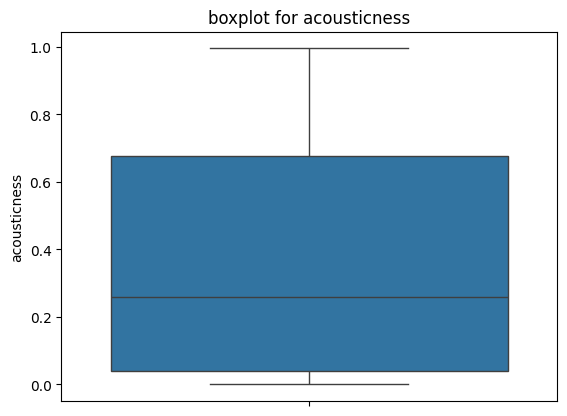

/Users/rohitnagotkar/CPSC 5310 ML/ML_course/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


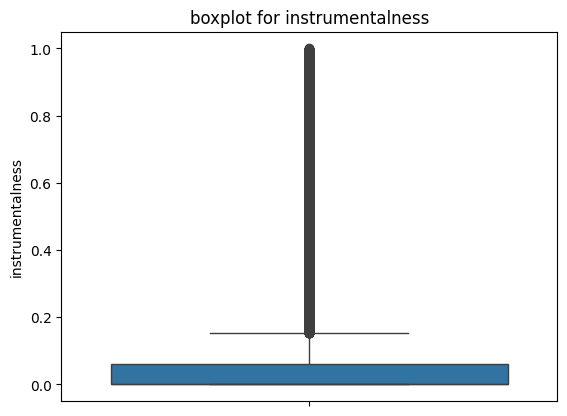

/Users/rohitnagotkar/CPSC 5310 ML/ML_course/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


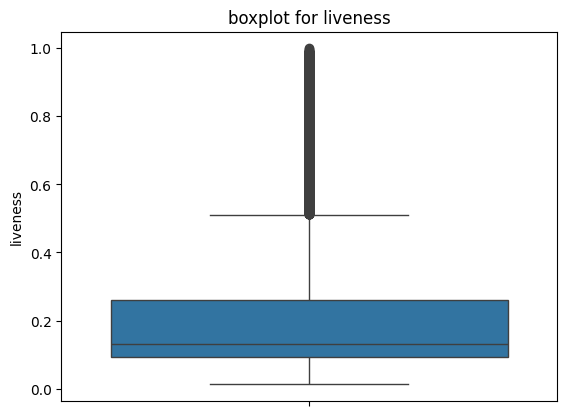

/Users/rohitnagotkar/CPSC 5310 ML/ML_course/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


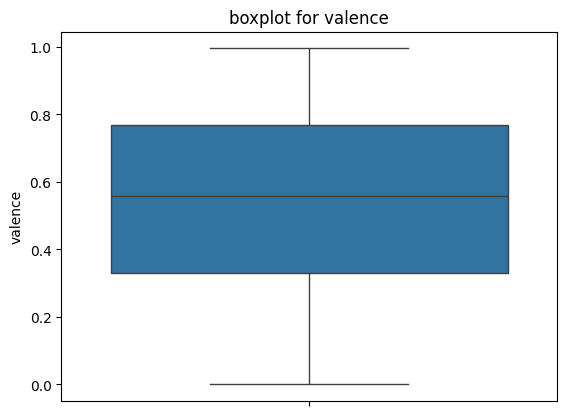

In [55]:
for col in ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence']:
       sns.boxplot(main_df[col])
       plt.title(f"Boxplot for {col}")
       plt.show()

In [5]:
main_df.isna().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

### Observations
- mode is 0 or 1
- key is 0 to 11